# <center>Welcome to DATA1030: Hands-on Data Science!</center>
## <center>Instructor: Andras Zsom</center>
## <center>HTA: Peter Huang</center>
## <center>TAs: Cang Tang, Qinyun Wu, Tina Wang, Zhujun Shen</center>

## The goal of this course: supervised Machine Learning (ML)
- supervised ML is probably the most successful area in ML (based on economic value created)
    - **online advertising**: given an ad and user info, will the user click on the ad?
    - **real estate**: given home features, can we predict the house price?
    - **finance**: given an applicant and a finalcial product (e.g., a loan), will this applicant be able to successfully pay back the loan?
    - **health care**: given a patient, symptoms, and maybe test results, can we predict the illness? 
    - ...
- supervised ML pros:
    - **automation**: computers perform calculations faster than humans (and computers are cheaper)
    - **learn from examples**: no need to explicitly tell the computer what to do. the computer figures out what to do based on examples (data)
- supervised ML con:
    - it can be difficult or labor-intensive to collect training data
    - there is no guarantee that you will be able to develop an accurate model based on the data you have

## Example: spam filters
- Traditional coding pipeline with explicit instructions

<center><img src="figures/traditional_pipeline.png" width="600"></center>

## Example: spam filters
- ML pipeline

<center><img src="figures/ML_pipeline.png" width="600"></center>

- the data: feature matrix (X) and target variable (Y)
    - X can be structured (tabular data most commonly stored in excel and csv files or SQL databases)
    - X can be unstructured (e.g., images, text, voice recording, video)
    - Y can be categorical, the problem is **classification** (e.g., click or not click on an ad, sick or not sick)
    - Y can be continuous, the problem is **regression** (e.g., predict house price, stock price, age)
- **we focus on structured data during this class!**

## Structured data
| X|feature_1|feature_2|...|feature_j|...|feature_m|<font color='red'>Y</font>|
|-|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|__data_point_1__|x_11|x_12|...|x_1j|...|x_1m|__<font color='red'>y_1</font>__|
|__data_point_2__|x_21|x_22|...|x_2j|...|x_2m|__<font color='red'>y_2</font>__|
|__...__|...|...|...|...|...|...|__<font color='red'>...</font>__|
|__data_point_i__|x_i1|x_i2|...|x_ij|...|x_im|__<font color='red'>y_i</font>__|
|__...__|...|...|...|...|...|...|__<font color='red'>...</font>__|
|__data_point_n__|x_n1|x_n2|...|x_nj|...|x_nm|__<font color='red'>y_n</font>__|

## Other areas of ML
- unsupervised ML 
   - only the feature matrix X is available, there is no target variable
   - the goal is to find structure (clusters) in the data
   - often used in customer segmentation
- recommender systems
   - recommend products to a customer based on what products similar customers enjoyed
- reinforcement learning
   - the learning system, called an agent, can observe the environment, select and perform actions, and get rewards and penalties in return. Goal: come up with strategy to maximize rewards
   - often used when virtual environment is available (e.g., games like go or warcraft)
   - sounds appealing to use in real environments (like self-driving cars) but agents learn slow, lots of cars would need to be broken to teach an agent to drive this way 
- deep learning
   - uses neural networks and often works with unstructured data
   - technically deep learning is supervised or unsupervised
   - extremely successful on large datasets

<center><img src="figures/shallow_vs_deep_learning.png" width="500"></center>

## Quiz

## The supervised ML pipeline
The goal: Use the training data (X and y) to develop a <font color='red'>model</font> which can <font color='red'>accurately</font> predict the target variable (y_new') for previously unseen data (X_new).

**1. Exploratory Data Analysis (EDA)**: you need to understand your data and verify that it doesn't contain errors
   - do as much EDA as you can!
    
**2. Split the data into different sets**: most often the sets are train, validation, and test (or holdout)
   - practitioners often make errors in this step!
   - you can split the data randomly, based on groups, based on time, or any other non-standard way if necessary to answer your ML question

**3. Preprocess the data**: ML models only work if X and Y are numbers! Some ML models additionally require each feature to have 0 mean and 1 standard deviation (standardized features)
   - often the original features you get contain strings (for example a gender feature would contain 'male', 'female', 'non-binary', 'unknown') which needs to transformed into numbers
   - often the features are not standardized (e.g., age is between 0 and 100) but it needs to be standardized
    
**4. Choose an evaluation metric**: depends on the priorities of the stakeholders
   - often requires quite a bit of thinking and ethical considerations
     
**5. Choose one or more ML techniques**: it is highly recommended that you try multiple models
   - start with simple models like linear or logistic regression
   - try also more complex models like nearest neighbors, support vector machines, random forest, etc.
    
**6. Tune the hyperparameters of your ML models (aka cross-validation)**
   - ML techniques have hyperparameters that you need to optimize to achieve best performance
   - for each ML model, decide which parameters to tune and what values to try
   - loop through each parameter combination
       - train one model for each parameter combination
       - evaluate how well the model performs on the validation set
   - take the parameter combo that gives the best validation score
   - evaluate that model on the test set to report how well the model is expected to perform on previously unseen data
    
**7. Interpret your model**: black boxes are often not useful
   - check if your model uses features that make sense (excellent tool for debugging)
   - often model predictions are not enough, you need to be able to explain how the model arrived to a particular prediction (e.g., in health care)

## Quiz

## Bias-variance tradeoff illustrated through a simple ML pipeline

In [1]:
# import packages

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from matplotlib import pylab as plt
import matplotlib
from matplotlib.colors import ListedColormap
%matplotlib inline

# scikit-learn code is reproducable is the random seed is fixed.
np.random.seed(2)

# read in the data
# our toy dataset, we don't know how it was generated.
df = pd.read_csv('data/toy_data.csv')

X = df[['x1','x2']].values
y = df['y'].values

print(np.shape(X))
print(np.shape(y))
print(np.unique(y,return_counts=True))

(100, 2)
(100,)
(array([0, 1]), array([42, 58]))


**1. Exploratory Data Analysis (EDA)**

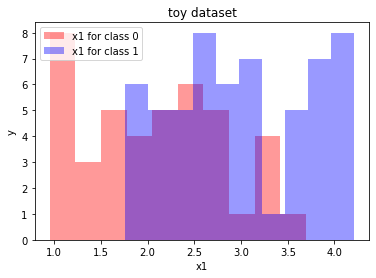

In [2]:
plt.hist(X[y==0,0],alpha=0.4,color='r',label='x1 for class 0')
plt.hist(X[y==1,0],alpha=0.4,color='b',label='x1 for class 1')
plt.xlabel('x1')
plt.ylabel('y')
plt.title('toy dataset')
plt.legend()
plt.show()

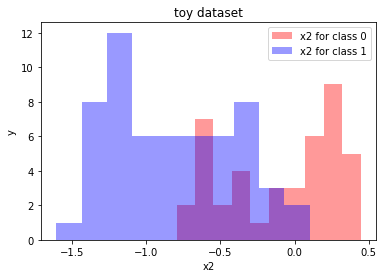

In [3]:
plt.hist(X[y==0,1],alpha=0.4,color='r',label='x2 for class 0')
plt.hist(X[y==1,1],alpha=0.4,color='b',label='x2 for class 1')
plt.xlabel('x2')
plt.ylabel('y')
plt.title('toy dataset')
plt.legend()
plt.show()

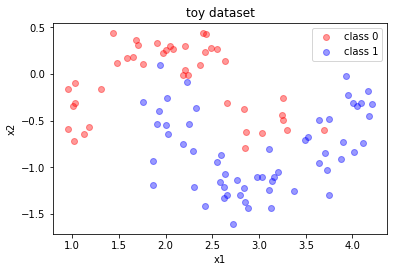

In [4]:
plt.scatter(X[y==0,0],X[y==0,1],color='r',label='class 0',alpha=0.4)
plt.scatter(X[y==1,0],X[y==1,1],color='b',label='class 1',alpha=0.4)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('toy dataset')
plt.gca().set_aspect('equal')
plt.legend()
plt.show()

**2. Split the data into different sets**

In [5]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, **options)
    Split arrays or matrices into random train and test subsets
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to the
        complement of the train size. If ``train_size`` is also Non

In [6]:
X_train, X_other, y_train, y_other = train_test_split(X,y,test_size=0.4)
print(np.shape(X_other),np.shape(y_other))
print('train:',np.shape(X_train),np.shape(y_train))

X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,test_size=0.5)
print('val:',np.shape(X_val),np.shape(y_val))
print('test:',np.shape(X_test),np.shape(y_test))

(40, 2) (40,)
train: (60, 2) (60,)
val: (20, 2) (20,)
test: (20, 2) (20,)


**3. Preprocess the data**

In [7]:
help(StandardScaler)

Help on class StandardScaler in module sklearn.preprocessing._data:

class StandardScaler(sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  StandardScaler(*, copy=True, with_mean=True, with_std=True)
 |  
 |  Standardize features by removing the mean and scaling to unit variance
 |  
 |  The standard score of a sample `x` is calculated as:
 |  
 |      z = (x - u) / s
 |  
 |  where `u` is the mean of the training samples or zero if `with_mean=False`,
 |  and `s` is the standard deviation of the training samples or one if
 |  `with_std=False`.
 |  
 |  Centering and scaling happen independently on each feature by computing
 |  the relevant statistics on the samples in the training set. Mean and
 |  standard deviation are then stored to be used on later data using
 |  :meth:`transform`.
 |  
 |  Standardization of a dataset is a common requirement for many
 |  machine learning estimators: they might behave badly if the
 |  individual features do not more or less look like s

In [8]:
scaler = StandardScaler().fit(X_train)
# the scaler object contains the feature means and variations in the training set
print(scaler.mean_)
print(scaler.var_)

# the scaler is used to transform the sets
X_train_prep = scaler.transform(X_train)
X_val_prep = scaler.transform(X_val)
X_test_prep = scaler.transform(X_test)


[ 2.61729782 -0.55283401]
[0.74350517 0.32379089]


**4. Choose an evaluation metric**

In [9]:
help(accuracy_score)

Help on function accuracy_score in module sklearn.metrics._classification:

accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)
    Accuracy classification score.
    
    In multilabel classification, this function computes subset accuracy:
    the set of labels predicted for a sample must *exactly* match the
    corresponding set of labels in y_true.
    
    Read more in the :ref:`User Guide <accuracy_score>`.
    
    Parameters
    ----------
    y_true : 1d array-like, or label indicator array / sparse matrix
        Ground truth (correct) labels.
    
    y_pred : 1d array-like, or label indicator array / sparse matrix
        Predicted labels, as returned by a classifier.
    
    normalize : bool, optional (default=True)
        If ``False``, return the number of correctly classified samples.
        Otherwise, return the fraction of correctly classified samples.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Sample weights.
 

**5. Choose one or more ML techniques**

In [10]:
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`sklearn.svm.LinearSVC` or
 |  :class:`sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 |  

**6. Tune the hyperparameters of your ML models (aka cross-validation)**

In [11]:
Cs = np.logspace(-1,3,13)
print(Cs)
train_scores = []
validation_scores = []
models = []
for C in Cs:
    classifier = SVC(kernel='rbf',C = C, probability=True) # this is our classifier
    classifier.fit(X_train_prep,y_train) # the model is fitted to the training data
    
    y_train_pred = classifier.predict(X_train_prep)
    train_accuracy = accuracy_score(y_train,y_train_pred) # calculate the validation accuracy
    train_scores.append(train_accuracy)
    
    y_val_pred = classifier.predict(X_val_prep) # predict the validation set
    validation_accuracy = accuracy_score(y_val,y_val_pred) # calculate the validation accuracy
    validation_scores.append(validation_accuracy)
    
    models.append(classifier)
    print(C, train_accuracy, validation_accuracy)


[1.00000000e-01 2.15443469e-01 4.64158883e-01 1.00000000e+00
 2.15443469e+00 4.64158883e+00 1.00000000e+01 2.15443469e+01
 4.64158883e+01 1.00000000e+02 2.15443469e+02 4.64158883e+02
 1.00000000e+03]
0.1 0.8166666666666667 0.8
0.21544346900318834 0.8333333333333334 0.8
0.46415888336127786 0.8666666666666667 0.85
1.0 0.9333333333333333 0.85
2.1544346900318834 0.9833333333333333 0.85
4.6415888336127775 0.9833333333333333 0.85
10.0 0.9666666666666667 0.85
21.54434690031882 0.9833333333333333 0.85
46.41588833612777 0.9833333333333333 0.9
100.0 0.9833333333333333 0.85
215.44346900318823 0.9833333333333333 0.85
464.15888336127773 1.0 0.8
1000.0 1.0 0.8


## The bias - variance tradeoff

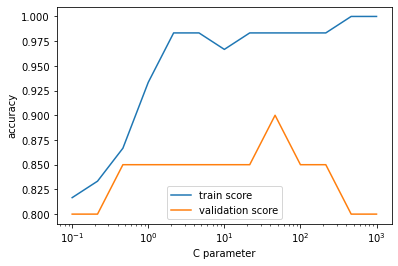

In [12]:
plt.plot(Cs,train_scores,label='train score')
plt.plot(Cs,validation_scores,label='validation score')
plt.semilogx()
plt.legend()
plt.xlabel('C parameter')
plt.ylabel('accuracy')
plt.show()

- **high bias model** (aka underfitting)
    - it performs poorly on the train and validation sets
    - small C values in the example above
- **high variance model** (aka overfitting)
    - it performs very well on the training set but it performs poorly on the validation set
    - high C
- the goal of the parameter tuning is to find the balance between bias and variance
    - usually the best model is the one with the best validation score
    - C = 46 in our case

### How does the best model perform on the test set?
- this score tells us how well the model generalizes to previously unseen data because the test set was not touched before
- usually it is close to the best validation score

In [13]:
y_test_pred = models[-5].predict(X_test_prep)
print(accuracy_score(y_test, y_test_pred))

0.95


**7. Interpret your model**
- with two features, this is easy
- plot the decision boundary and probabilities

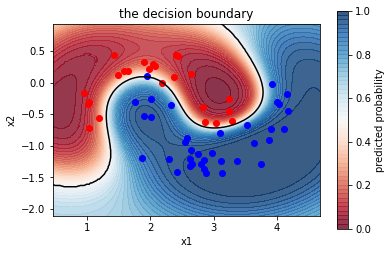

In [14]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# use the best model with C = 46
classifier = models[-5] 
# scale the data before predicting! this is very important!
Z = classifier.predict_proba(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))[:, 1] 

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z,vmin=0,vmax=1,levels=[0.5],colors=['k'])
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8,vmin=0,vmax=1,levels=np.arange(0,1.02,0.02))
plt.colorbar(ticks=[0,0.2,0.4,0.6,0.8,1],label='predicted probability')
plt.scatter(X_train[y_train==0,0],X_train[y_train==0,1],color='r',label='class 0')
plt.scatter(X_train[y_train==1,0],X_train[y_train==1,1],color='b',label='class 1')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('the decision boundary')
plt.gca().set_aspect('equal')
plt.savefig('figures/decision_boundary.jpg',dpi=150)
plt.show()

## Quiz

# <center> Course structure</center>
### <center> Course website: https://data1030.github.io </center>
### <center> Canvas: https://canvas.brown.edu/courses/1082531</center>


## Course components:
- lectures, remote component
    - weekly video recordings and quizzes available in canvas 
    - videos will be released latest by thursday noon
    - watch the videos by noon on each monday
- lectures, live component
    - class divided into two groups: one in-person group and one zoom group
    - the in-person group meets on tuesdays 10:30 to noon
    - the zoom session is on thursdays 10:30 to noon
    - each group meets with me for 1-1.5 hours per week
    - the goal of these meetings is to discuss muddy topics and solve coding exercises (review problem set solutions)
    - whatever I discuss on tuesday will be repeated on thursday
- weekly problem sets
    - coding problems and questions with 1-2 paragraph answers
    - the questions prepare you for your job interviews
- two short exams
    - most likely short, open-book exams towards the middle and end of the term
- one semester-long project
   - find a dataset and come up with your own machine learning question
   - develop code individually, but feel free to discuss with others
   - assigned TA mentor with regular dedicated meetings

## Grading
- lectures, remote component: **10%** weight
    - you can skip or be late with the videos three times during the term
    - the quiz answers are not graded so don't worry if you don't answer them correctly!
- lectures, live component: **0%** weight
    - I highly recommend that you join at least the zoom sessions but I do not want to force anyone to participate in large group gatherings if they do not wish to do so
- weekly problem sets: **30%** weight
    - this is a substantial component
- exams: **20%** weight
    - exams are short, the weight is pretty low
- project: **40%** weight
    - highest weighted component!
    - make sure to spend sufficient time on this each week!
    - the semester will go by very quickly...
- **90% minimum is necessary to get an A** but I reserve the right to lower the threshold
- my experience based on last fall is that Bs are rare, C is given under exceptional circumstances

## Deadlines (preliminary, subject to change)
- **1st project progress report**: end of September, early October
    - data selection, EDA, and formulate your ML question
    - rubric will be available two weeks in advance
- **1st project presentation**: week of October 5th (multiple dates)
    - short presentation on dataset, EDA, and ML question (7 min + 2 min questions per student)
    - rubric will be available two weeks in advance
- **midterm exam**: week of October 19th
- **final project progress report**: early December
    - the complete ML pipeline and results
    - rubric will be available two weeks in advance
- **final presentations**: early December
    - another short presentation on ML pipeline and results
    - rubric will be available two weeks in advance
- **final exam**: week of December 7th
- grades finalized and submitted by December 18th
- I am on vacation without electronics and hopefully somewhere warm and tropical during the first two weeks of January :) 

## Other course resources
- piazza: course forum
    - feel free to discuss any questions or concerns regarding the material
    - the TAs and I will keep an eye on it and answer questions in a timely manner
    - disclaimer: I turn off my laptop after 6pm and during the weekends
- office hours (TAs and mine)
    - see the course google calendar
